In [44]:
# importing necessary libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm 
from scipy.stats import pearsonr
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
import itertools

# Use ggplot style for visulizations
plt.style.use('ggplot')

In [45]:
# # Import Rubella data
#
data = pd.read_excel('Rubella1.xlsx', index=False)

# Read the required columns
data = data[['sample_id', 'od_1', 'result_1', 'od_2', 'result_2']]

# Set new column names
data.columns = [['id', 'mercia_data', 'mercia_resp', 'platelia_data', 'platelia_resp']]

# Change negative and positive values to 0 and 1 respectively 
data = data.replace('Positive', 1)
data = data.replace('NEGATIVE', 0)
data = data.replace('EQUIVOCAL', 0)


# Print columns and head
print(data.columns)
data.head()

MultiIndex(levels=[['id', 'mercia_data', 'mercia_resp', 'platelia_data', 'platelia_resp']],
           labels=[[0, 1, 2, 3, 4]])


,id,mercia_data,mercia_resp,platelia_data,platelia_resp
0,16V0090107,0.949,1,1.560,1
1,16V0090602,0.902,1,1.272,1
2,16V0090604,0.192,0,0.740,0
3,16V0090660,1.012,1,1.258,1
4,16V0090346,1.229,1,1.427,1


In [46]:
# Describe the 5 point statistics of the dataset
data.describe()

,mercia_data,mercia_resp,platelia_data,platelia_resp
count,138.000000,138.000000,138.000000,138.000000
mean,0.694370,0.833333,1.192522,0.876812
std,0.337968,0.374036,0.411154,0.329851
min,0.017000,0.000000,0.037000,0.000000
25%,0.450750,1.000000,1.026250,1.000000
50%,0.689500,1.000000,1.269500,1.000000
75%,0.980000,1.000000,1.467750,1.000000
max,1.405000,1.000000,1.876000,1.000000


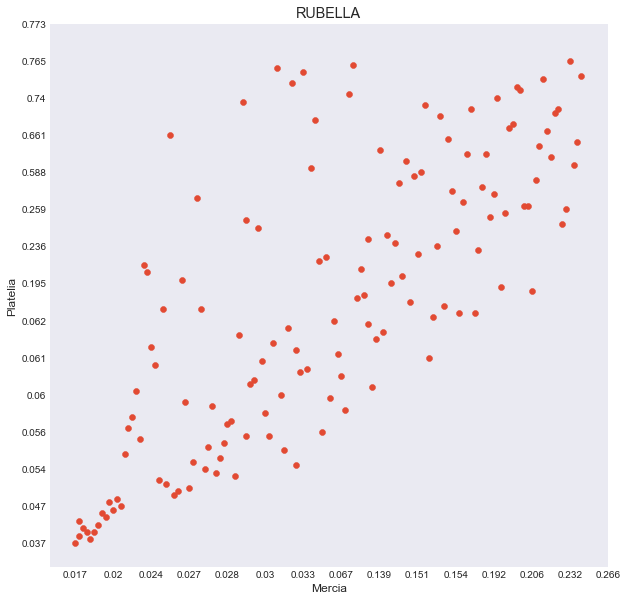

In [47]:
# Scatter plot between evo and rmp data readings 

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
plt.scatter(data.mercia_data, data.platelia_data)
plt.xlabel('Mercia')
plt.ylabel('Platelia')
plt.title('RUBELLA')
plt.xticks(np.arange(0, 150, step=10))
plt.yticks(np.arange(0, 150, step=10))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19ed4048>]],
      dtype=object)

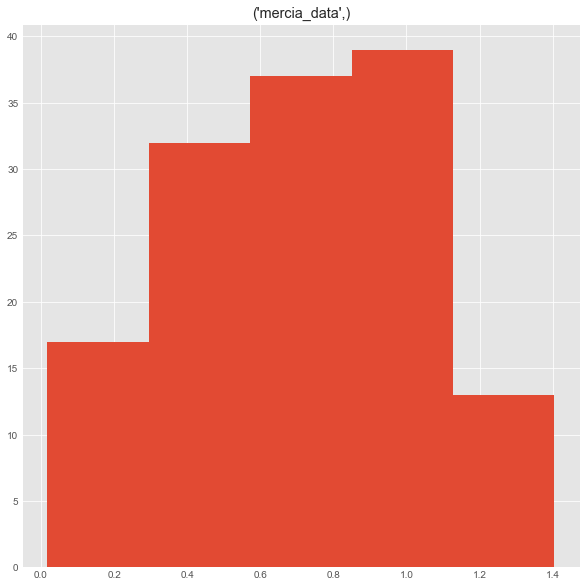

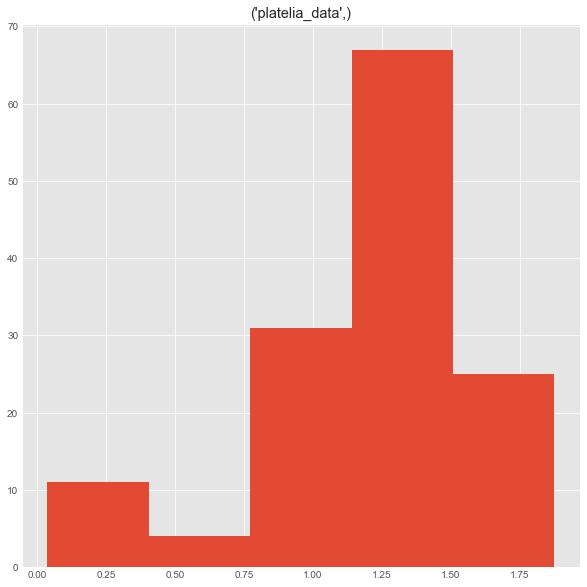

In [32]:
# Plot histograms to inspect the typical values

data['mercia_data'].hist(bins=5)
data['platelia_data'].hist(bins=5)


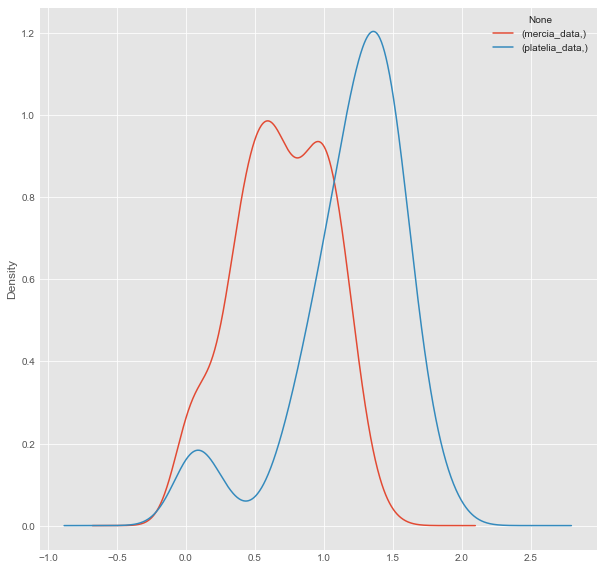

In [33]:
# Plot distributions as overlapping kde plots

kde = data[['mercia_data', 'platelia_data']].copy()
kde.plot.kde()

In [35]:
# Convert data to numpy arrays and calculate pearson correlation coefficient

x = np.array(data.mercia_data)
y = np.array(data.platelia_data)

In [36]:
# Pearson Correlation

corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.792


In [37]:
# Effect Size Measurement

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s


d = cohend(x,y)
print('Cohens d: %.3f' % d)

Cohens d: -1.324


In [38]:
# Run Independant and dependant t-tests 

from scipy import stats
stats.ttest_ind(x,y)

Ttest_indResult(statistic=array([-10.99514822]), pvalue=array([1.5499312e-23]))

In [39]:
stats.ttest_rel(x,y)

Ttest_relResult(statistic=array([-23.30636097]), pvalue=array([1.62623851e-49]))

In [40]:
# Calculate confusion and matrix and diagnosticsa

EVO=np.hstack(np.array(data['mercia_resp']))
RMP=np.hstack(np.array(data['platelia_resp']))

cm = ConfusionMatrix(EVO, RMP)
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False         15     8       23
True           2   113      115
__all__       17   121      138
population: 138
P: 115
N: 23
PositiveTest: 121
NegativeTest: 17
TP: 113
TN: 15
FP: 8
FN: 2
TPR: 0.9826086956521739
TNR: 0.6521739130434783
PPV: 0.9338842975206612
NPV: 0.8823529411764706
FPR: 0.34782608695652173
FDR: 0.06611570247933884
FNR: 0.017391304347826087
ACC: 0.927536231884058
F1_score: 0.9576271186440678
MCC: 0.7198147009437228
informedness: 0.6347826086956521
markedness: 0.8162372386971317
prevalence: 0.8333333333333334
LRP: 2.825
LRN: 0.026666666666666665
DOR: 105.93750000000001
FOR: 0.11764705882352941


Confusion matrix, without normalization
[[ 15   8]
 [  2 113]]


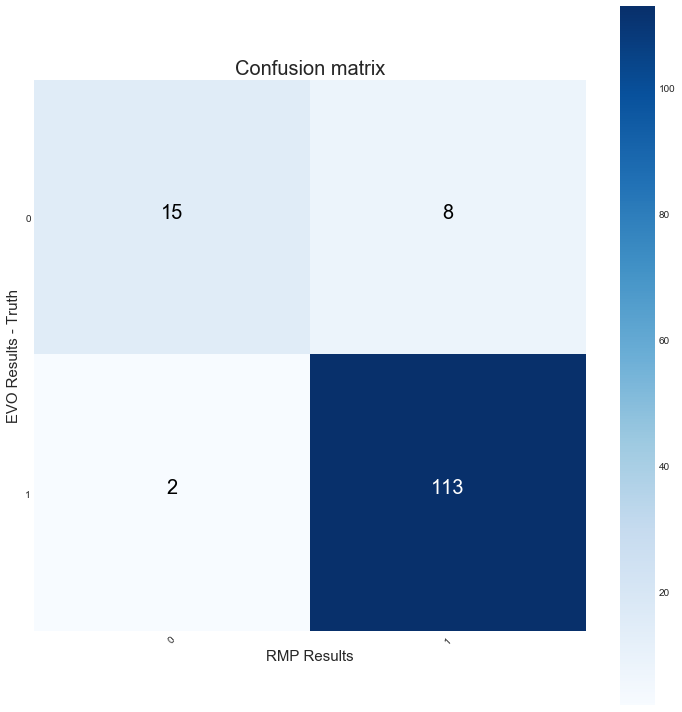

In [48]:
# Draw Confusion matrix for report
# Motivation for this visualization has been taken from stackoverflow discussion at:
# https://stackoverflow.com/questions/48817300/sklearn-plot-confusion-matrix-combined-across-trainingtest-sets

from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.style.use('seaborn-dark')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt ), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('EVO Results - Truth', fontsize=15)
    plt.xlabel('RMP Results', fontsize=15)


cm = confusion_matrix(EVO,RMP)

plt.figure()
plot_confusion_matrix(cm, classes = [0,1], title='Confusion matrix')